In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from helpers import sum_matrices, plot_confusion_matrix, preprocess_data, fit_and_test, final_fit_and_test 
from data_structures import PreprocessingConfiguration, DataHolder

from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC

In [2]:
phones_data = pd.read_csv('./train.csv')

## Creating preprocessing config

Tells what method and order use for decomposition and normalization

In [3]:
config = PreprocessingConfiguration([PCA(n_components=5), MinMaxScaler()])
X_tr, X_tst, y_tr, y_tst = preprocess_data(phones_data, config)

In [4]:
learn_data = DataHolder(X_tr, y_tr)
test_data = DataHolder(X_tst, y_tst)

## Testing classifiers with default parameters values 

Classifier: LogisticRegression
Average accuracy: 92.62%
Average F1 score: [0.96 0.88 0.89 0.97]


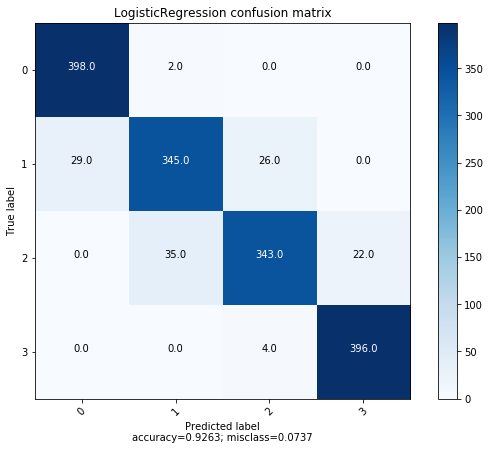

Classifier: DecisionTreeClassifier
Average accuracy: 87.44%
Average F1 score: [0.92 0.84 0.83 0.91]


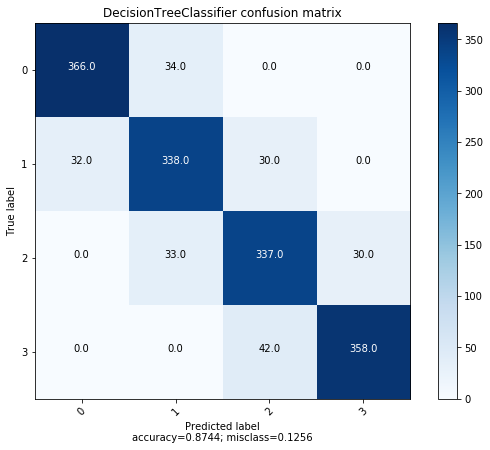

C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifier: RandomForestClassifier
Average accuracy: 90.25%
Average F1 score: [0.94 0.88 0.86 0.92]


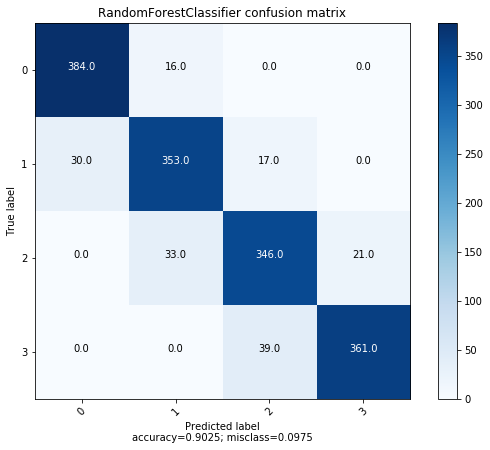

Classifier: GaussianNB
Average accuracy: 79.06%
Average F1 score: [0.89 0.7  0.69 0.88]


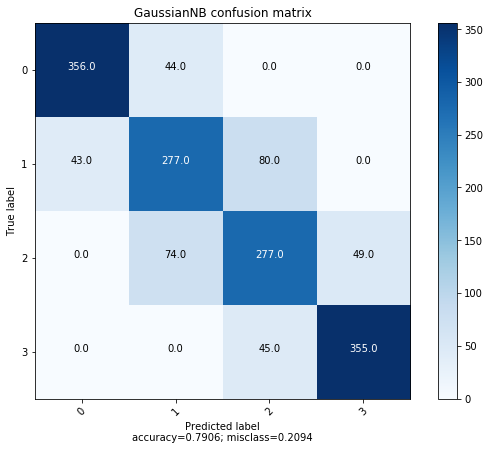

Classifier: KNeighborsClassifier
Average accuracy: 84.31%
Average F1 score: [0.92 0.81 0.77 0.88]


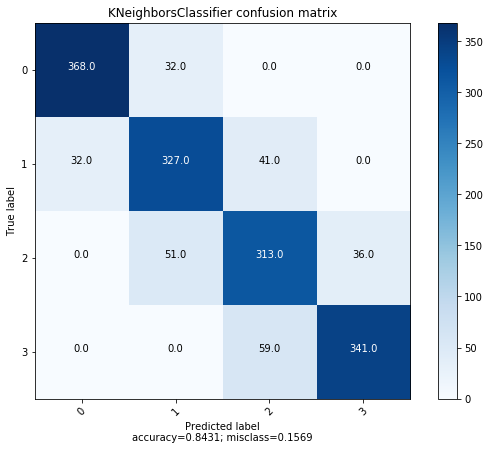

Classifier: SVC
Average accuracy: 94.31%
Average F1 score: [0.97 0.92 0.92 0.97]


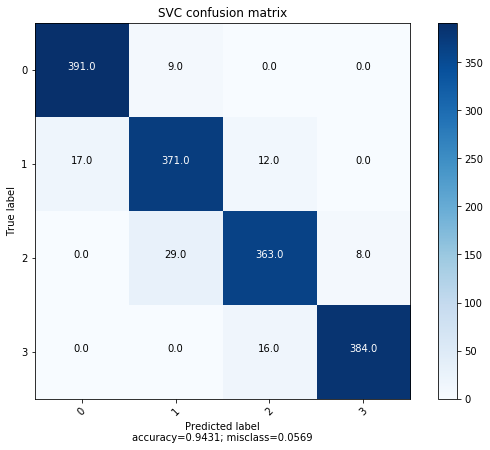

Classifier: LinearSVC
Average accuracy: 80.56%
Average F1 score: [0.93 0.68 0.66 0.91]


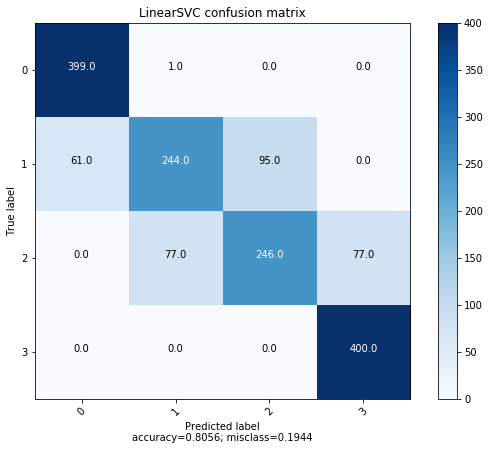

Classifier: NuSVC
Average accuracy: 94.87%
Average F1 score: [0.97 0.93 0.93 0.97]


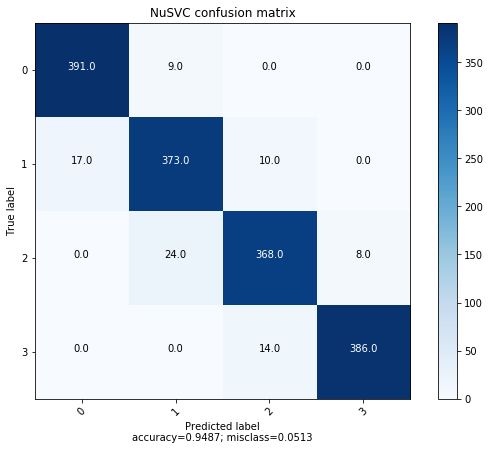

In [5]:
logisticRegressionClf = LogisticRegression(random_state=1, solver='lbfgs', multi_class='auto', n_jobs=-1)
decisionTreeClf = DecisionTreeClassifier(random_state=1)
randomForestClf = RandomForestClassifier(random_state=1, n_jobs=-1)
gaussianNBClf = GaussianNB()
kNeighborsClf = KNeighborsClassifier(n_jobs=-1)
svcClf = SVC(gamma='auto', random_state=1)
linearSVCClf = LinearSVC(random_state=1)
nuSVCClf = NuSVC(nu=0.5, kernel='rbf', degree=3, gamma='auto', random_state=1)

classifiers = [
    logisticRegressionClf,
    decisionTreeClf,
    randomForestClf,
    gaussianNBClf,
    kNeighborsClf,
    svcClf,
    linearSVCClf,
    nuSVCClf
]

classifiers_names = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'GaussianNB',
    'KNeighborsClassifier',
    'SVC',
    'LinearSVC',
    'NuSVC'
]

untuned_classifiers_results = []
for clf, name in zip(classifiers, classifiers_names):
    result = fit_and_test(clf, name, learn_data, True)
    untuned_classifiers_results.append((name, result))

## Testing classifiers after optimization of hyperparameters with a PSO algorithm

Classifier: LogisticRegression
Average accuracy: 96.87%
Average F1 score: [0.99 0.96 0.95 0.97]


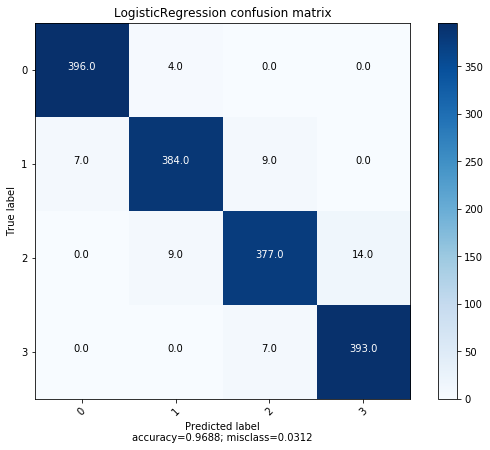

Classifier: DecisionTreeClassifier
Average accuracy: 87.62%
Average F1 score: [0.93 0.83 0.82 0.92]


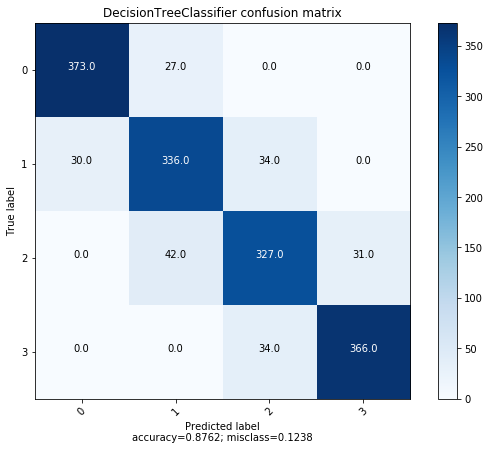

Classifier: RandomForestClassifier
Average accuracy: 91.75%
Average F1 score: [0.94 0.89 0.89 0.94]


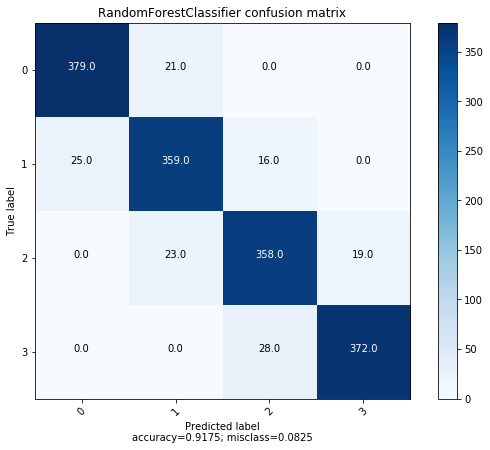

Classifier: KNeighborsClassifier
Average accuracy: 86.44%
Average F1 score: [0.93 0.83 0.81 0.9 ]


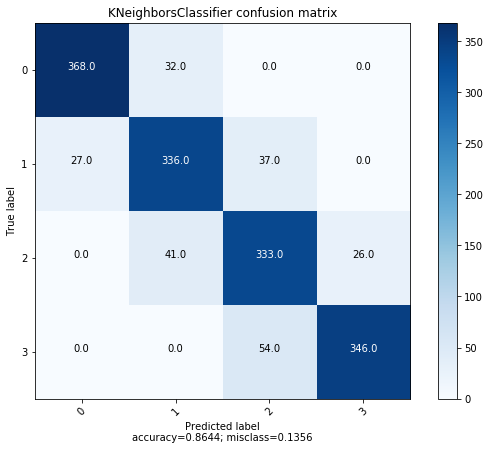

Classifier: SVC
Average accuracy: 96.37%
Average F1 score: [0.98 0.96 0.95 0.97]


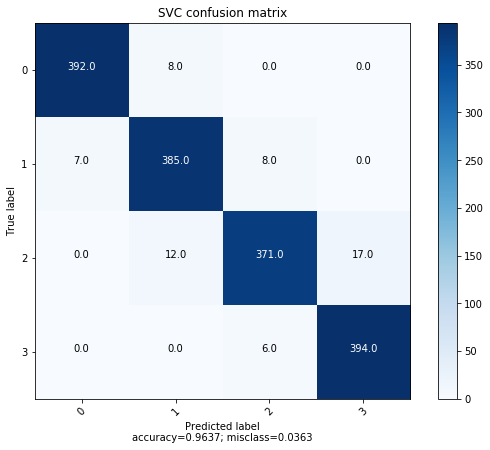

C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblin

Classifier: LinearSVC
Average accuracy: 85.31%
Average F1 score: [0.97 0.73 0.73 0.96]


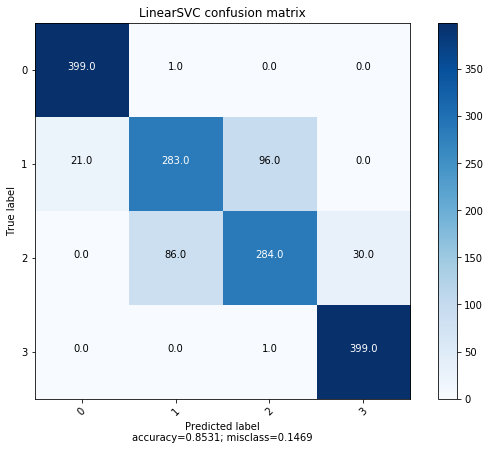

Classifier: NuSVC
Average accuracy: 96.75%
Average F1 score: [0.99 0.96 0.95 0.97]


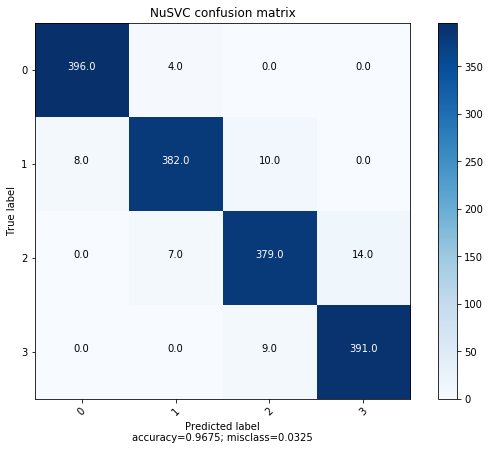

In [6]:
logisticRegressionClf = LogisticRegression(C=455.33828766,
                                           random_state=1,
                                           solver='lbfgs',
                                           multi_class='auto',
                                           n_jobs=-1)

decisionTreeClf = DecisionTreeClassifier(criterion='entropy',
                                         max_depth=11,
                                         min_samples_leaf=4,
                                         min_samples_split=6,
                                         random_state=1)

randomForestClf = RandomForestClassifier(criterion='gini',
                                         n_estimators=221,
                                         min_samples_leaf=3,
                                         min_samples_split=2,
                                         random_state=1,
                                         n_jobs=-1)

kNeighborsClf = KNeighborsClassifier(n_neighbors=15,
                                     metric='euclidean',
                                     weights='distance',
                                     n_jobs=-1)

svcClf = SVC(C=26.94935661,
             kernel='linear',
             degree=8.68259809,
             gamma=0.84283593,
             probability =True,
             random_state=1)

linearSVCClf = LinearSVC(loss='squared_hinge',
                         C=23.03128166,
                         max_iter=2000,
                         random_state=1)

nuSVCClf = NuSVC(nu=0.06198783,
                 kernel='linear',
                 degree=1,
                 gamma=0.96813834,
                 probability =True,
                 random_state=1)

classifiers = [
    logisticRegressionClf,
    decisionTreeClf,
    randomForestClf,
    kNeighborsClf,
    svcClf,
    linearSVCClf,
    nuSVCClf
]

classifiers_names = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'KNeighborsClassifier',
    'SVC',
    'LinearSVC',
    'NuSVC'
]

tuned_classifiers_results = []

for clf, name in zip(classifiers, classifiers_names):
    result = fit_and_test(clf, name, learn_data, True)
    tuned_classifiers_results.append((name, result))

## Increase in prediction accuracy after hyperparameter optimization

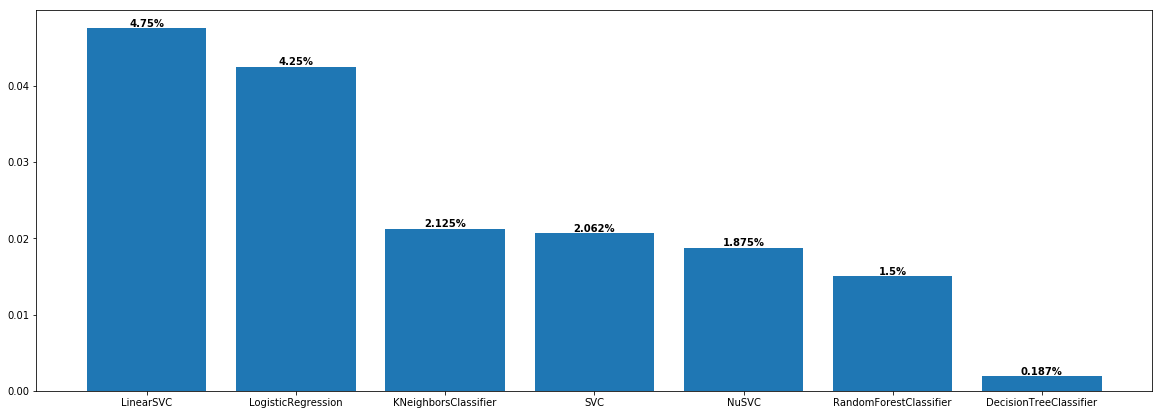

In [7]:
result_differences = [(i,abs(j-l)) 
                      for i,j in tuned_classifiers_results 
                      for k,l in untuned_classifiers_results 
                      if i==k]
result_differences = sorted(result_differences, key=lambda x: -x[1])

names, values = zip(*result_differences)
plt.figure(figsize=(20, 7))
plt.bar(names, values)
for n,v in zip(names, values):
    plt.text(n, v, f'{round(v*100, 3)}%', fontweight='bold', ha='center', va='bottom')

plt.show()

## Ensemble classifier

Classifier: ensemble classifiers
Average accuracy: 97.0%
Average F1 score: [0.99 0.97 0.95 0.97]


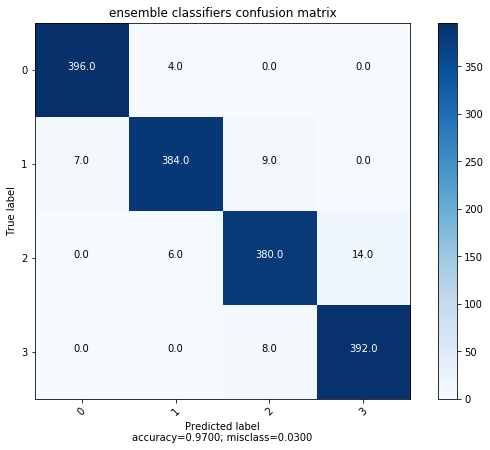

0.97

In [8]:
ensemble_classifiers = VotingClassifier(estimators=[('LogisticRegression', logisticRegressionClf),
                                                    ('SVC', svcClf),
                                                    ('NuSVC', nuSVCClf)],
                                        voting='soft')

fit_and_test(ensemble_classifiers, 'ensemble classifiers', learn_data, True)

## Final testing of the calibrated classifiers on a test set

In [9]:
classifiers.append(ensemble_classifiers)
classifiers_names.append('ensemble_classifiers')

Classifier: LogisticRegression
Accuracy: 98.0%
F1 score: [1.   0.97 0.96 0.99]


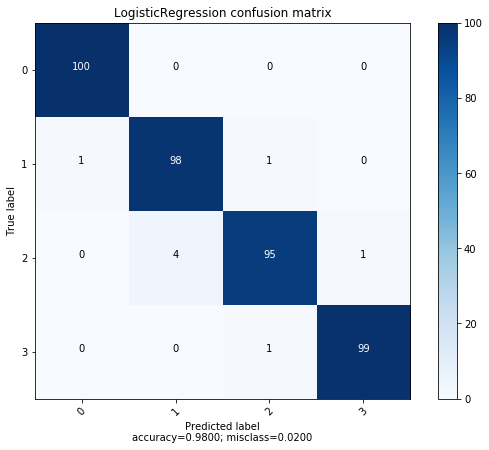

Classifier: DecisionTreeClassifier
Accuracy: 88.75%
F1 score: [0.93 0.86 0.84 0.92]


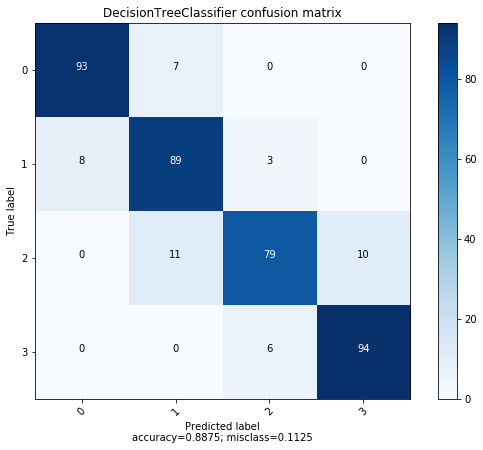

Classifier: RandomForestClassifier
Accuracy: 93.25%
F1 score: [0.94 0.88 0.92 0.98]


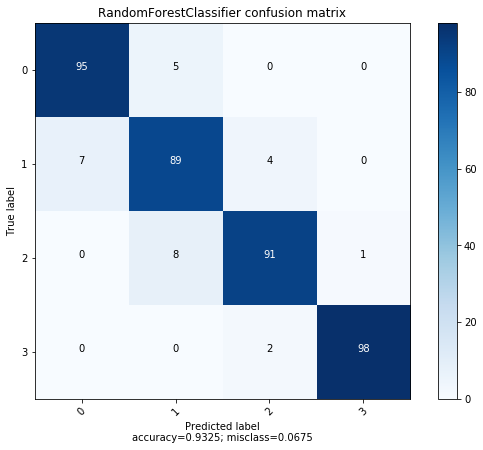

Classifier: KNeighborsClassifier
Accuracy: 88.25%
F1 score: [0.93 0.85 0.82 0.93]


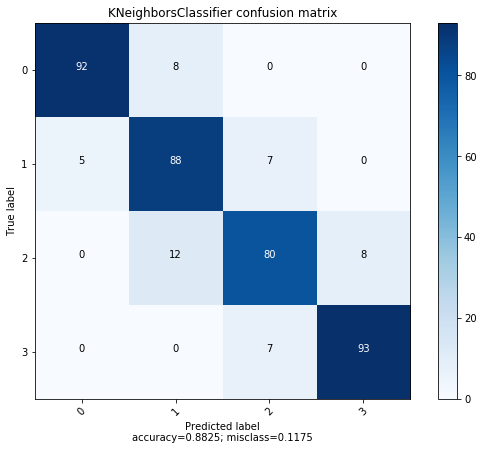

Classifier: SVC
Accuracy: 98.0%
F1 score: [1.   0.97 0.96 0.99]


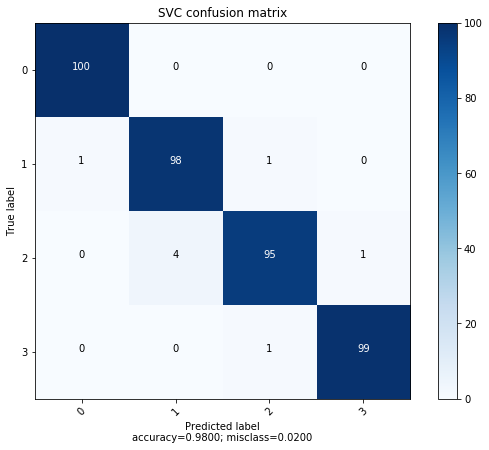

C:\Users\Filip\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Classifier: LinearSVC
Accuracy: 85.75%
F1 score: [0.99 0.75 0.72 0.96]


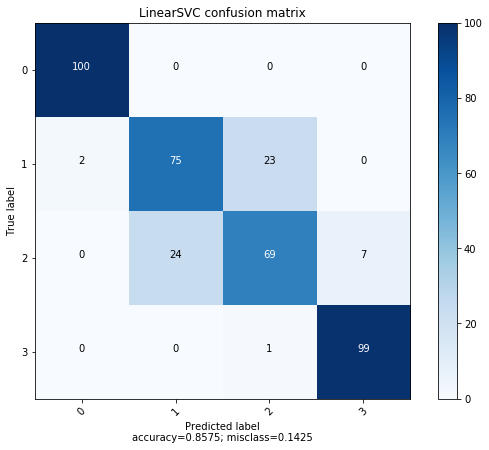

Classifier: NuSVC
Accuracy: 98.0%
F1 score: [1.   0.97 0.96 0.99]


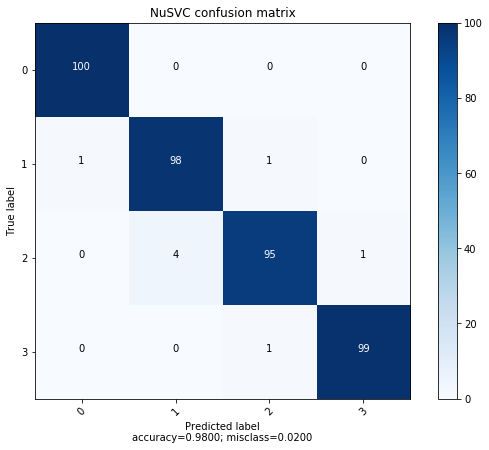

Classifier: ensemble_classifiers
Accuracy: 98.0%
F1 score: [1.   0.97 0.96 0.99]


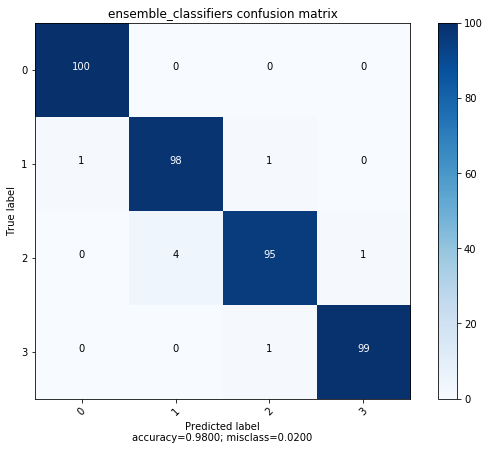

In [10]:
classifiers_final_results = []
for clf, name in zip(classifiers, classifiers_names):
    classifiers_final_results.append((name, final_fit_and_test(clf, name, learn_data, test_data)))

## Graphical representation of the final prediction accuracy

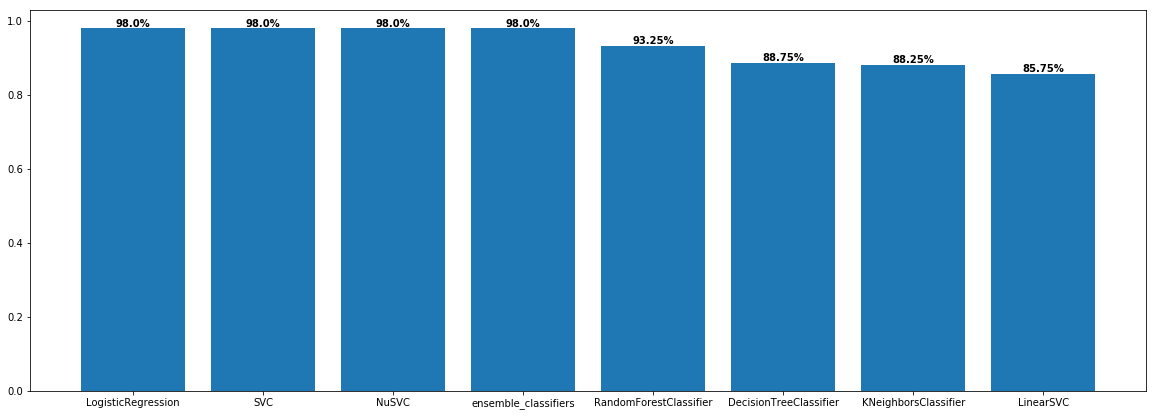

In [11]:
classifiers_final_results = sorted(classifiers_final_results, key=lambda x: -x[1])
names, values = zip(*classifiers_final_results)
plt.figure(figsize=(20, 7))
plt.bar(names, values)
for n,v in zip(names, values):
    plt.text(n, v, f'{round(v*100, 3)}%', fontweight='bold', ha='center', va='bottom')

plt.show()